In [334]:
import random as r
import pandas as pd
import numpy as np


n_samples = 10000


chars = '1234567890abcdefghijk'
user_id_len = 15
user_ids = set()
while len(user_ids) < n_samples:
    s = ''.join(r.choices(chars, k=user_id_len))
    user_ids.add(s)


max_order_num = 9
order_nums = []
for _ in range(1, n_samples + 1):
    order_nums.append(r.randint(1, max_order_num))


mean = 1440
std = 200
delivery_times = np.round(np.random.normal(mean, std, n_samples), 10)



lambda_ = 1
shift = 1
total_sums = np.round(np.random.exponential(lambda_, n_samples) + shift, 3)


retention_probabilities = [0.35, 0.25, 0.2, 0.15, 0.05]
retention_numbers = [1, 2, 3, 4, 5]
retentions = np.random.choice(retention_numbers, n_samples, p=retention_probabilities)


data = pd.DataFrame({
    'user_id': list(user_ids),
    'order_num': order_nums,
    'delivery_time': delivery_times,
    'total_sum': total_sums,
    'retention': retentions
    })

data

,user_id,order_num,delivery_time,total_sum,retention
0,h5ic16a8b9ie2gf,3,1486.390513,1.443,1
1,127b26bf68cfcga,3,1275.185833,1.222,4
2,dacgf4d9i65abcb,7,1026.472473,3.449,4
3,je789722k0a9fi3,3,1442.449211,3.353,3
4,59gggceebhg354g,9,1299.748112,1.169,3
...,...,...,...,...,...
9995,436ad8998377cb0,4,1441.590607,1.564,1
9996,j0h107h1db5g111,6,1522.765118,2.612,1
9997,hh7e2be1id7jaf5,4,1479.428948,1.481,1
9998,52jkae4b0bg9jh1,4,1725.869889,1.233,1


In [335]:
mean_delivery_time_data = pd.DataFrame({'mean_delivery_time': np.round(data.groupby('order_num')['delivery_time'].mean())})
merged_data = pd.merge(data, mean_delivery_time_data, on='order_num')
merged_data

,user_id,order_num,delivery_time,total_sum,retention,mean_delivery_time
0,h5ic16a8b9ie2gf,3,1486.390513,1.443,1,1446.0
1,127b26bf68cfcga,3,1275.185833,1.222,4,1446.0
2,dacgf4d9i65abcb,7,1026.472473,3.449,4,1444.0
3,je789722k0a9fi3,3,1442.449211,3.353,3,1446.0
4,59gggceebhg354g,9,1299.748112,1.169,3,1439.0
...,...,...,...,...,...,...
9995,436ad8998377cb0,4,1441.590607,1.564,1,1448.0
9996,j0h107h1db5g111,6,1522.765118,2.612,1,1438.0
9997,hh7e2be1id7jaf5,4,1479.428948,1.481,1,1448.0
9998,52jkae4b0bg9jh1,4,1725.869889,1.233,1,1448.0


In [336]:
n_in_every_segment = 3
num_segments = (max_order_num + n_in_every_segment - 1) // n_in_every_segment
bins = [i * n_in_every_segment for i in range(num_segments + 1)]
labels = [f'{i * n_in_every_segment + 1}-{(i + 1) * n_in_every_segment}' for i in range(num_segments)]

merged_data['segment'] = pd.cut(merged_data['order_num'], bins=bins, labels=labels)
merged_data

,user_id,order_num,delivery_time,total_sum,retention,mean_delivery_time,segment
0,h5ic16a8b9ie2gf,3,1486.390513,1.443,1,1446.0,1-3
1,127b26bf68cfcga,3,1275.185833,1.222,4,1446.0,1-3
2,dacgf4d9i65abcb,7,1026.472473,3.449,4,1444.0,7-9
3,je789722k0a9fi3,3,1442.449211,3.353,3,1446.0,1-3
4,59gggceebhg354g,9,1299.748112,1.169,3,1439.0,7-9
...,...,...,...,...,...,...,...
9995,436ad8998377cb0,4,1441.590607,1.564,1,1448.0,4-6
9996,j0h107h1db5g111,6,1522.765118,2.612,1,1438.0,4-6
9997,hh7e2be1id7jaf5,4,1479.428948,1.481,1,1448.0,4-6
9998,52jkae4b0bg9jh1,4,1725.869889,1.233,1,1448.0,4-6


In [337]:
total_sum_desc = pd.DataFrame(merged_data['total_sum'].describe()).T
total_sum_desc

,count,mean,std,min,25%,50%,75%,max
total_sum,10000.0,2.00083,1.009581,1.0,1.287,1.691,2.386,11.551


In [338]:
most_frequent_total_sum = merged_data['total_sum'].value_counts()


print(f'Медиана: {total_sum_desc["50%"].values[0]}')
print(f'Мода: {most_frequent_total_sum.index[0]}; встречается {most_frequent_total_sum.iloc[0]} раз')
print(f'Среднее: {total_sum_desc["mean"].values[0]}')
print(f'Дисперсия: {np.var(merged_data["total_sum"])}')
print(f'Стандартное отклонение: {total_sum_desc["std"].values[0]}')

Медиана: 1.691
Мода: 1.002; встречается 21 раз
Среднее: 2.0008303
Дисперсия: 1.01915276770191
Стандартное отклонение: 1.0095814445458213


In [339]:
import matplotlib.pyplot as plt
merged_data

,user_id,order_num,delivery_time,total_sum,retention,mean_delivery_time,segment
0,h5ic16a8b9ie2gf,3,1486.390513,1.443,1,1446.0,1-3
1,127b26bf68cfcga,3,1275.185833,1.222,4,1446.0,1-3
2,dacgf4d9i65abcb,7,1026.472473,3.449,4,1444.0,7-9
3,je789722k0a9fi3,3,1442.449211,3.353,3,1446.0,1-3
4,59gggceebhg354g,9,1299.748112,1.169,3,1439.0,7-9
...,...,...,...,...,...,...,...
9995,436ad8998377cb0,4,1441.590607,1.564,1,1448.0,4-6
9996,j0h107h1db5g111,6,1522.765118,2.612,1,1438.0,4-6
9997,hh7e2be1id7jaf5,4,1479.428948,1.481,1,1448.0,4-6
9998,52jkae4b0bg9jh1,4,1725.869889,1.233,1,1448.0,4-6


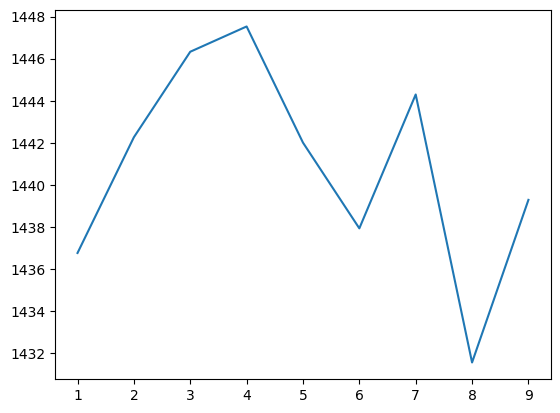

In [340]:
plt.plot(merged_data.groupby('order_num')['delivery_time'].mean())

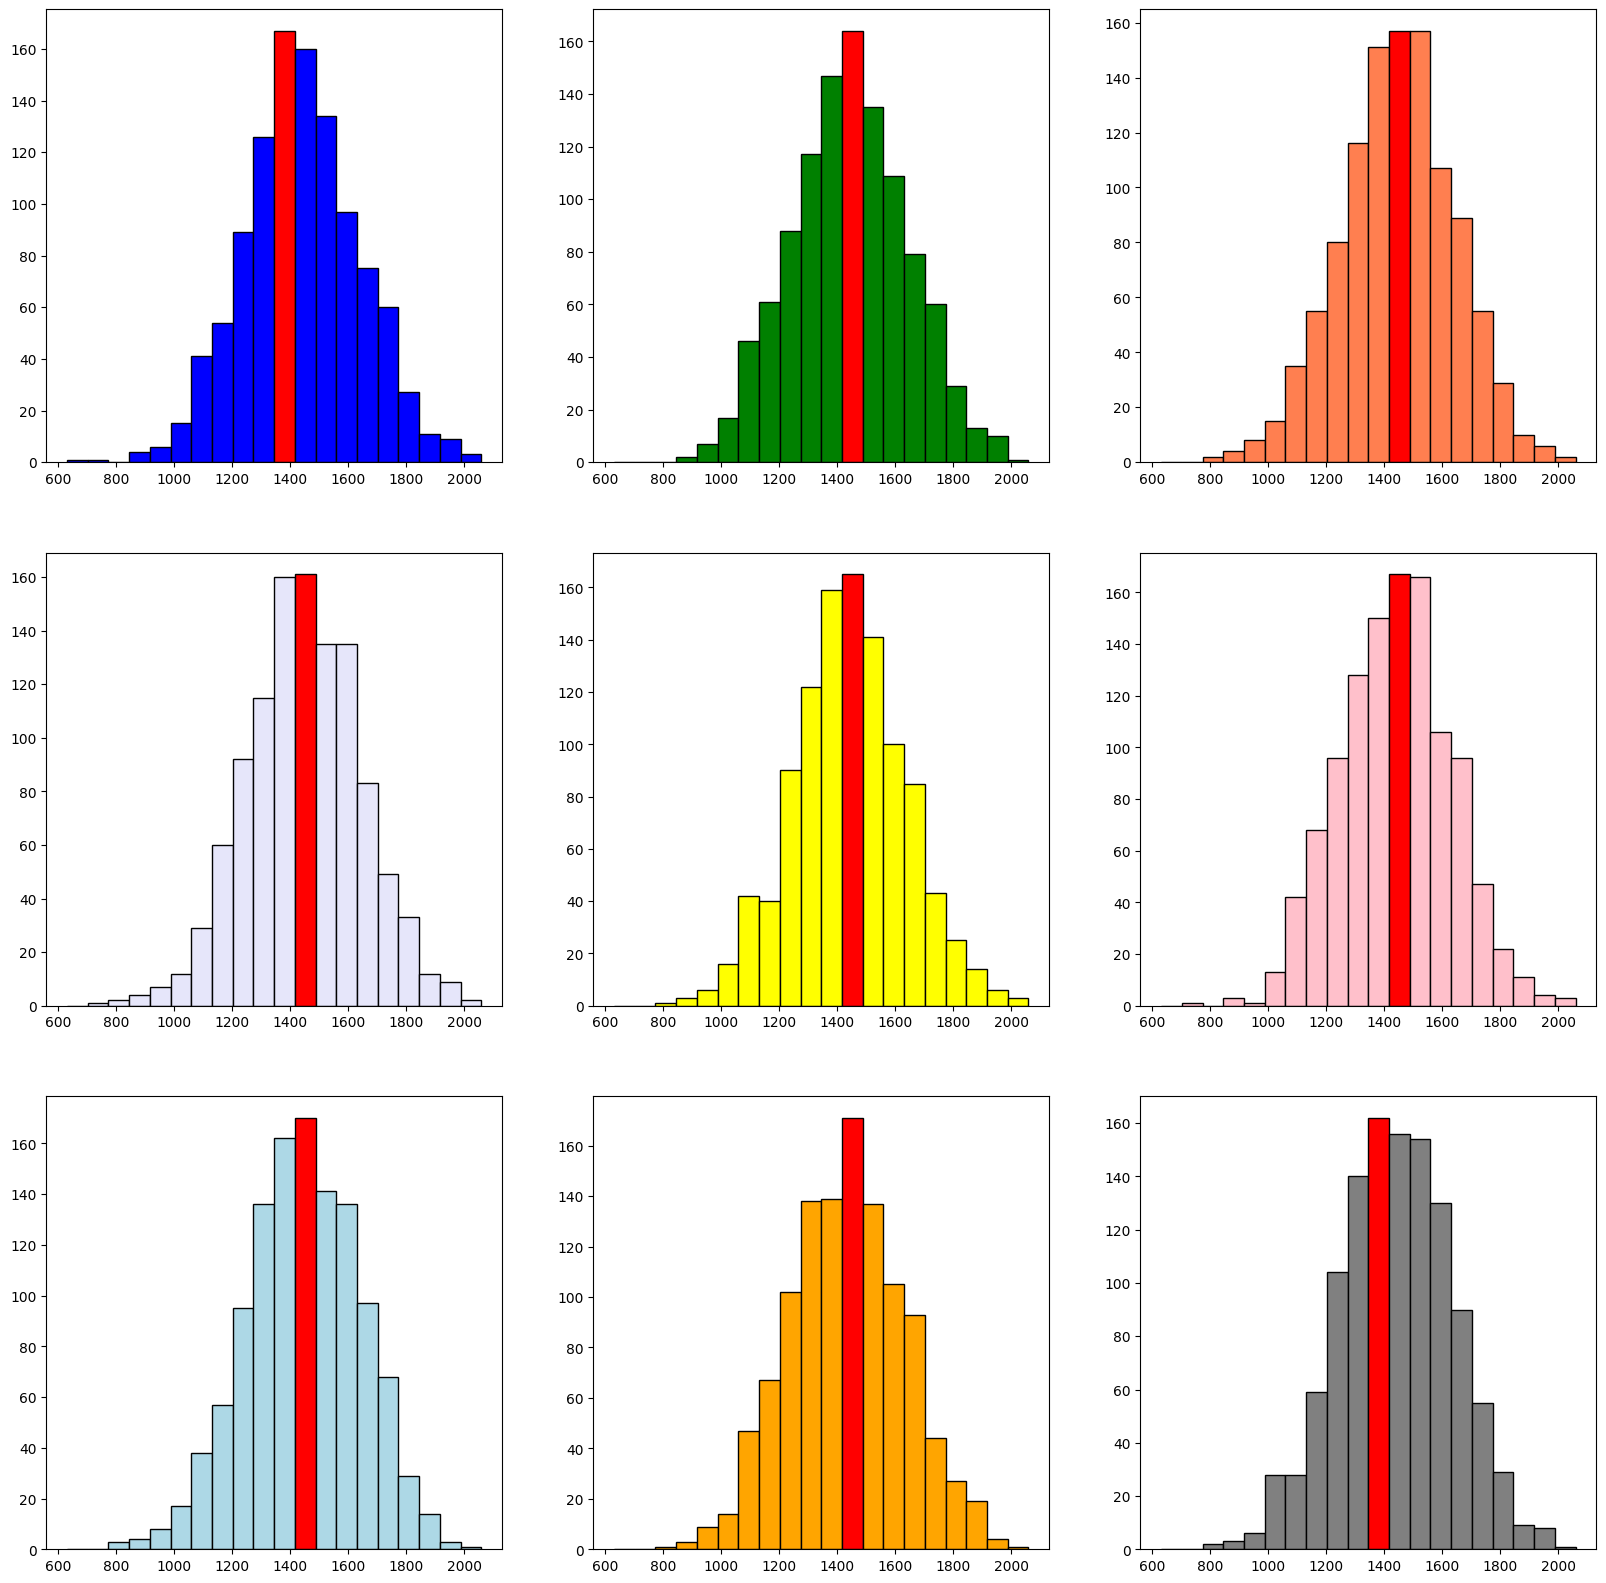

In [341]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
assert len(axs) * len(axs[0]) == max_order_num
curr_order_num = 0
bins = 20
colors = [
    "blue",
    "green",
    "coral",
    "lavender",
    "yellow",
    "pink",
    "lightblue",
    "orange",
    "gray"
]
for i in range(len(axs)):
    for j in range(len(axs[0])):
        curr_order_num += 1
        counts, bins, patches = axs[i, j].hist(merged_data[merged_data['order_num'] == curr_order_num]['delivery_time'], 
                       bins=bins, 
                       color=colors[curr_order_num - 1],
                       edgecolor='black'
                       )
        max_index = np.argmax(counts)
        patches[max_index].set_facecolor('red')
        #axs[i, j].title(f'Номер заказа {curr_order_num}')

In [342]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.cluster import KMeans

/var/folders/jd/kkmnjfgd3zjfxt0jb2p4gdy40000gn/T/ipykernel_49070/549127619.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_data['total_sum'] = x_scaler.fit_transform(clustered_data[['total_sum']])
/var/folders/jd/kkmnjfgd3zjfxt0jb2p4gdy40000gn/T/ipykernel_49070/549127619.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_data['delivery_time'] = x_scaler.fit_transform(clustered_data[['delivery_time']])


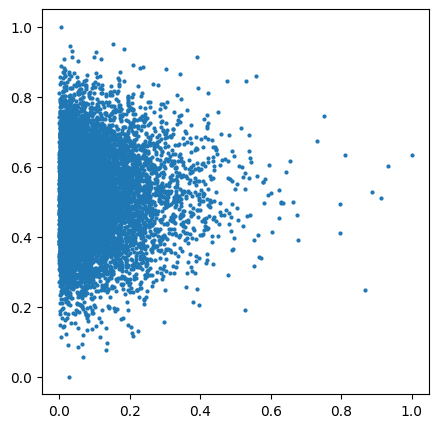

In [343]:
plt.figure(figsize=(5, 5))
clustered_data = merged_data[['total_sum', 'delivery_time']]

x_scaler = MinMaxScaler()
clustered_data['total_sum'] = x_scaler.fit_transform(clustered_data[['total_sum']])
clustered_data['delivery_time'] = x_scaler.fit_transform(clustered_data[['delivery_time']])
plt.plot(clustered_data['total_sum'], clustered_data['delivery_time'], 'o', markersize=2)

In [344]:
### валидировать кластеризацию будем методом локтя, используя внутрикластерное расстояние
sums_inertia = {}
for i in range(2, 10):
    clusters = KMeans(n_clusters=i).fit(clustered_data)
    sums_inertia[clusters.inertia_] = clusters

print(sums_inertia[min(sums_inertia)])


KMeans(n_clusters=9)


<Axes: xlabel='total_sum', ylabel='delivery_time'>

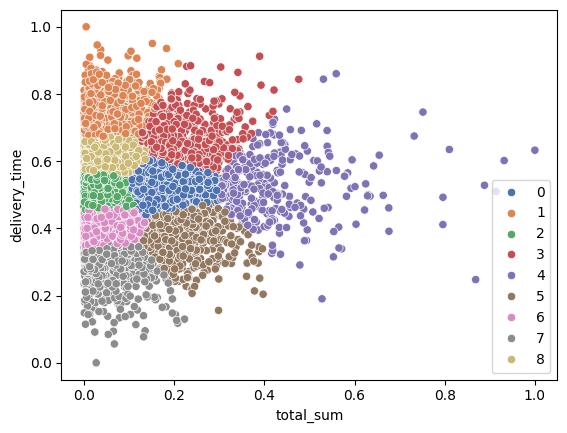

In [345]:
labels = sums_inertia[min(sums_inertia)].labels_
sns.scatterplot(x=clustered_data['total_sum'], y=clustered_data['delivery_time'], hue=labels, palette='deep')